In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
facebook = pd.read_csv('facebook.csv',header=None,names=["source","target"])
google = pd.read_csv('google.csv',header=None,names=["source","target"])

## Discription of Dataset

In [3]:
facebook.head()


,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [4]:
google.head()

,source,target
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0


In [5]:
google.isnull().any()


source    False
target    False
dtype: bool

In [6]:
facebook.isnull().any()

source    False
target    False
dtype: bool

In [7]:
graph_facebook = nx.Graph()
for ind in facebook.index:
  graph_facebook.add_edge(facebook['source'][ind], facebook['target'][ind])

In [8]:
graph_google = nx.read_edgelist('web-Google.txt', create_using = nx.DiGraph)
# print(nx.info(G_tmp))

In [9]:
nx.info(graph_facebook)

'Graph with 4039 nodes and 88234 edges'

In [10]:
nx.info(graph_google)

'DiGraph with 875713 nodes and 5105039 edges'

In [11]:
nx.is_connected(graph_facebook)

True

In [12]:
nx.is_directed(graph_google)

True

In [13]:
nx.is_directed(graph_facebook)

False

## Plotting the degree distribution of the network

#### The Facebook dataset is undirected graph therefore it is fairly straightforward to plot the degree distribution of the graph. For plotting degree distribution we have used the nx.degree_histogram method

Text(0, 0.5, 'Frequency')

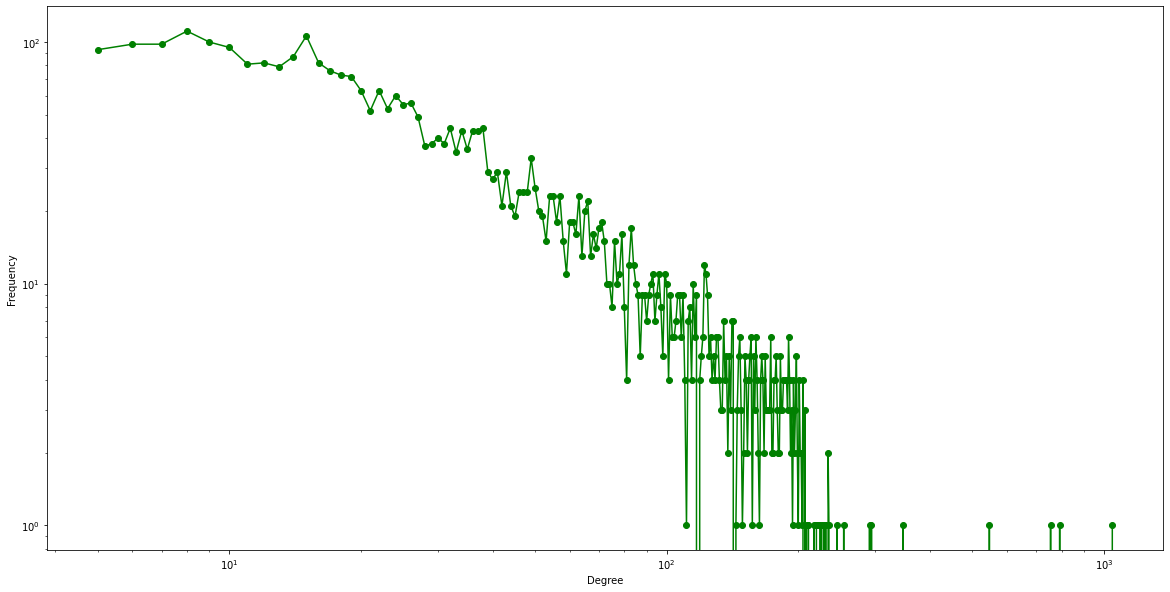

In [14]:
m=5

degree_freq = nx.degree_histogram(graph_facebook)
degrees = range(len(degree_freq))
plt.figure(figsize=(20, 10)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

 Maximum, Minimum and Standarad Deviation of Degrees for the Facebook Network (undirected)

In [15]:
degrees = [val for (node, val) in graph_facebook.degree()]

In [16]:
max_degree = max(degrees)
print("Maximum Degree:-",max_degree)

Maximum Degree:- 1045


In [17]:
min_degree = min(degrees)
print("Minimum Degree:-",min_degree)

Minimum Degree:- 1


In [18]:
average_degree = sum(degrees)/len(degrees)
print("Average Degree:-",average_degree)

Average Degree:- 43.69101262688784


In [19]:
mean = sum(degrees) / len(degrees)
variance = sum([((x - mean) ** 2) for x in degrees]) / len(degrees)
std = variance ** 0.5

print("Standard deviation:- " + str(std))


Standard deviation:- 52.41411556737502


#### In case of directed graph, we need to slightly modify the nx.degree_histogram function to find the distribution of indegree and outdegree of the graph

In [20]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree: #for finding the indegree
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes] 
    elif out_degree: #for finding the outdegree
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

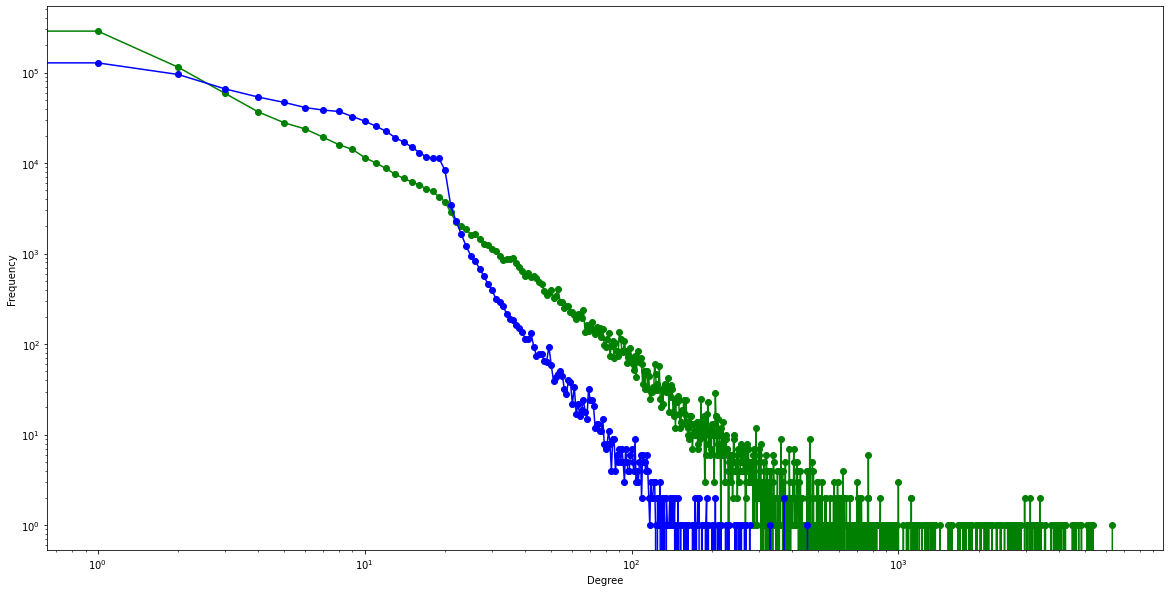

In [21]:
in_degree_freq = degree_histogram_directed(graph_google, in_degree=True)
out_degree_freq = degree_histogram_directed(graph_google, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(20, 10)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

Maximum, Minimum and Standarad Deviation of Degrees for the Facebook Network (undirected)

In Degree

In [22]:
# in_degree = dict(graph_google.in_degree())
in_degree = [val for (node, val) in graph_google.in_degree()]

In [23]:
max_in_degree = max(in_degree)
print("Maximum In Degree:-",max_in_degree)

Maximum In Degree:- 6326


In [24]:
min_in_degree = min(in_degree)
print("Minimum In Degree:-",min_in_degree)

Minimum In Degree:- 0


In [25]:
average_in_degree = sum(in_degree)/len(in_degree)
print("Average In Degree:-",average_in_degree)

Average In Degree:- 5.829580010802626


In [26]:
mean = sum(in_degree) / len(in_degree)
variance = sum([((x - mean) ** 2) for x in in_degree]) / len(in_degree)
std = variance ** 0.5

print("Standard deviation:- " + str(std))


Standard deviation:- 39.22897027717595


Out Degree

In [27]:
out_degree = [val for (node, val) in graph_google.out_degree()]

In [28]:
max_out_degree = max(out_degree)
print("Maximum Out Degree:-",max_out_degree)

Maximum Out Degree:- 456


In [29]:
min_out_degree = min(out_degree)
print("Minimum Out Degree:-",min_out_degree)

Minimum Out Degree:- 0


In [30]:
average_out_degree = sum(out_degree)/len(out_degree)
print("Average Out Degree:-",average_out_degree)

Average Out Degree:- 5.829580010802626


In [31]:
mean = sum(out_degree) / len(out_degree)
variance = sum([((x - mean) ** 2) for x in out_degree]) / len(out_degree)
std = variance ** 0.5

print("Standard deviation:- " + str(std))

Standard deviation:- 6.593697311106739


## Finding All the Centrality Measures

#### For Facebook

In [13]:
from networkx.algorithms.centrality import degree_centrality, eigenvector_centrality_numpy\
                                                ,katz_centrality_numpy, closeness_centrality\
                                                                                ,betweenness_centrality

In [14]:
degree_centrality_dict = degree_centrality(graph_facebook)
eigenvector_centrality_dict = eigenvector_centrality_numpy(graph_facebook)
katz_centrality_dict = katz_centrality_numpy(graph_facebook)
pagerank_centraliy_dict = nx.pagerank_numpy(graph_facebook)
closeness_centrality_dict = closeness_centrality(graph_facebook)
betweenness_centrality_dict = betweenness_centrality(graph_facebook)

facebook_centrality = ({'Node' : [node for node in graph_facebook.nodes()],
                  'Degree_Centrality' : [degree_centrality_dict[node] for node in graph_facebook.nodes()],
                  'Closeness_Centrality' : [closeness_centrality_dict[node] for node in graph_facebook.nodes()],
                  'Betweenness_Centrality' : [betweenness_centrality_dict[node] for node in graph_facebook.nodes()],
                  'Eigenvector_Centrality' : [eigenvector_centrality_dict[node] for node in graph_facebook.nodes()],
                  'Katz_Centrality' : [katz_centrality_dict[node] for node in graph_facebook.nodes()],
                  'PageRank_Centrality' : [pagerank_centraliy_dict[node] for node in graph_facebook.nodes()]
})

/var/folders/gj/35ct11l52fq913rx4n_ts6cr0000gn/T/ipykernel_1573/3988097465.py:4: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_centraliy_dict = nx.pagerank_numpy(graph_facebook)


In [15]:
facebook_centrality = pd.DataFrame.from_dict(facebook_centrality)

In [35]:
facebook_centrality.head(10)

,Node,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank_Centrality
0,0,0.085934,0.353343,1.463059e-01,3.313350e-05,0.043520,0.006225
1,1,0.004210,0.261376,2.783274e-06,5.970601e-07,0.003200,0.000236
2,2,0.002476,0.261258,7.595021e-08,2.165775e-07,-0.002886,0.000199
3,3,0.004210,0.261376,1.685066e-06,6.559843e-07,-0.005344,0.000226
4,4,0.002476,0.261258,1.840332e-07,2.169066e-07,0.006269,0.000233
5,5,0.003219,0.261308,2.205964e-06,1.176008e-06,0.002780,0.000202
6,6,0.001486,0.261190,2.453776e-08,2.105732e-07,0.002209,0.000175
7,7,0.004953,0.274769,1.702985e-04,2.567205e-05,0.016808,0.000263
8,8,0.001981,0.261224,2.760498e-07,2.131188e-07,0.002600,0.000231
9,9,0.014116,0.262055,1.645424e-05,2.203199e-06,-0.002860,0.000604


In [36]:
facebook_centrality.describe()

,Node,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank_Centrality
count,4039.000000,4039.000000,4039.000000,4.039000e+03,4.039000e+03,4039.000000,4039.000000
mean,2019.000000,0.010820,0.276168,6.669574e-04,3.861377e-03,0.000708,0.000248
std,1166.103197,0.012982,0.036124,1.164634e-02,1.525560e-02,0.015721,0.000258
min,0.000000,0.000248,0.178255,0.000000e+00,3.634695e-14,-0.099580,0.000041
25%,1009.500000,0.002724,0.260348,3.997507e-07,4.372482e-08,-0.004550,0.000141
50%,2019.000000,0.006191,0.282457,2.918300e-06,8.273741e-07,0.000508,0.000218
75%,3028.500000,0.014116,0.315001,1.515292e-05,1.097124e-05,0.005838,0.000310
max,4038.000000,0.258791,0.459699,4.805181e-01,9.540586e-02,0.106398,0.007575


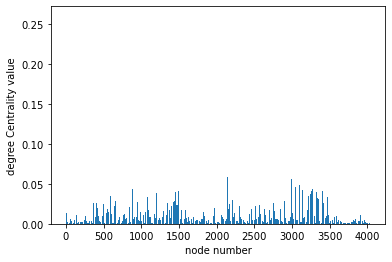

In [16]:
names = list(degree_centrality_dict.keys())
values = list(degree_centrality_dict.values())
plt.bar(range(len(degree_centrality_dict)), values)
plt.xlabel("node number")
plt.ylabel("degree Centrality value")
plt.show()

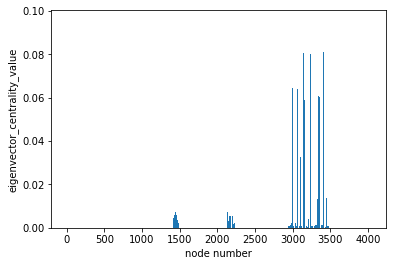

In [18]:
names = list(eigenvector_centrality_dict.keys())
values = list(eigenvector_centrality_dict.values())
plt.bar(range(len(eigenvector_centrality_dict)), values)
plt.xlabel("node number")
plt.ylabel("eigenvector_centrality_value")
plt.show()

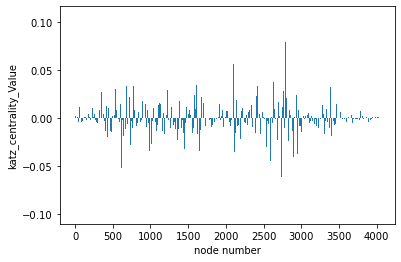

In [19]:
names = list(katz_centrality_dict.keys())
values = list(katz_centrality_dict.values())
plt.bar(range(len(katz_centrality_dict)), values)
plt.xlabel("node number")
plt.ylabel("katz_centrality_Value")
plt.show()

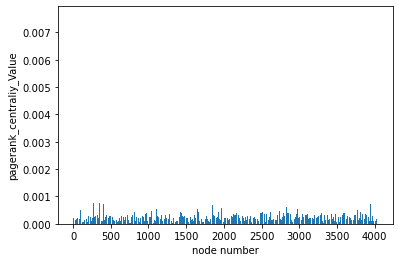

In [20]:
names = list(pagerank_centraliy_dict.keys())
values = list(pagerank_centraliy_dict.values())
plt.bar(range(len(pagerank_centraliy_dict)), values)
plt.xlabel("node number")
plt.ylabel("pagerank_centraliy_Value")
plt.show()

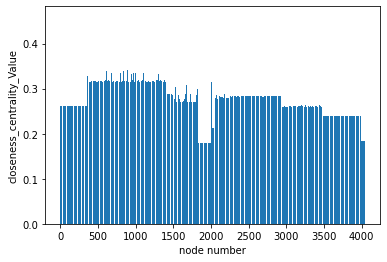

In [21]:
names = list(closeness_centrality_dict.keys())
values = list(closeness_centrality_dict.values())
plt.bar(range(len(closeness_centrality_dict)), values)
plt.xlabel("node number")
plt.ylabel("closeness_centrality_Value")
plt.show()

<AxesSubplot:xlabel='Node'>

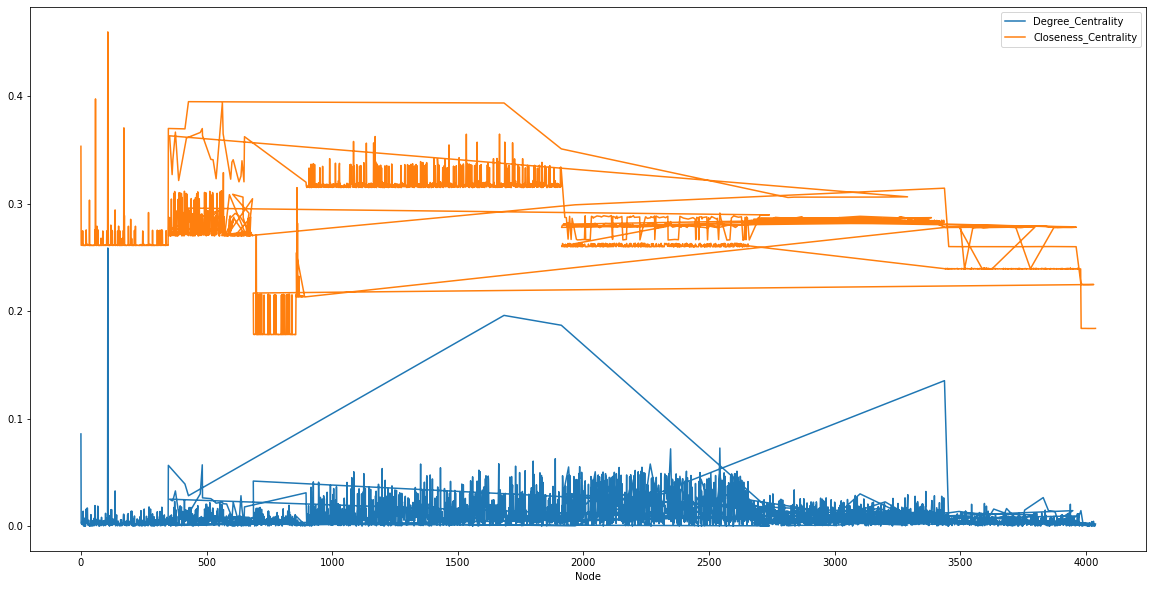

In [37]:
facebook_centrality.plot(x="Node", y=["Degree_Centrality","Closeness_Centrality"],
        kind="line", figsize=(20,10))

<AxesSubplot:xlabel='Node'>

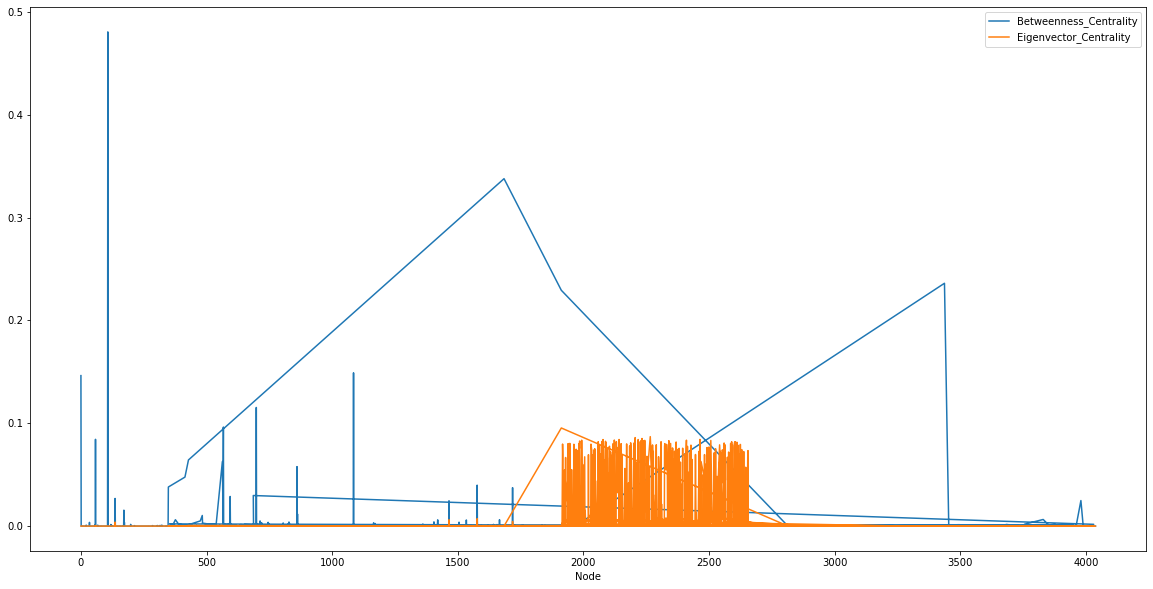

In [38]:

facebook_centrality.plot(x="Node", y=["Betweenness_Centrality","Eigenvector_Centrality"],
        kind="line", figsize=(20,10))

<AxesSubplot:xlabel='Node'>

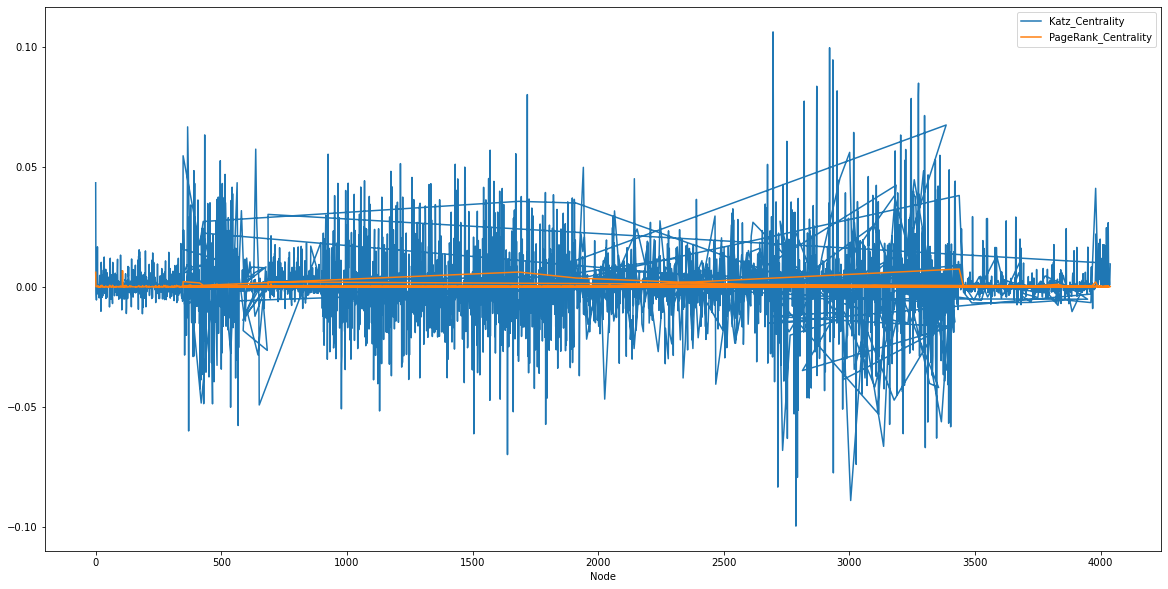

In [39]:
facebook_centrality.plot(x="Node", y=["Katz_Centrality","PageRank_Centrality"],
        kind="line", figsize=(20,10))

#### For Google

In [40]:
res=[]
with open("web-Google.txt") as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)

In [41]:
sample = random.sample(res, 5000)
filename=open('data.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [42]:
graph_google_sample = nx.read_edgelist('data.txt',nodetype=int,create_using=nx.DiGraph())

In [ ]:
degree_centrality_dict = degree_centrality(graph_google_sample)
eigenvector_centrality_dict = eigenvector_centrality_numpy(graph_google_sample)
katz_centrality_dict = katz_centrality_numpy(graph_google_sample)
closeness_centrality_dict = closeness_centrality(graph_google_sample)
betweenness_centrality_dict = betweenness_centrality(graph_google_sample)
pagerank_centraliy_dict = nx.pagerank_numpy(graph_google_sample)

google_centrality = ({'Node' : [node for node in graph_google_sample.nodes()],
                  'Degree_Centrality' : [degree_centrality_dict[node] for node in graph_google_sample.nodes()],
                  'Closeness_Centrality' : [closeness_centrality_dict[node] for node in graph_google_sample.nodes()],
                  'Betweenness_Centrality' : [betweenness_centrality_dict[node] for node in graph_google_sample.nodes()],
                  'Eigenvector_Centrality' : [eigenvector_centrality_dict[node] for node in graph_google_sample.nodes()],
                  'Katz_Centrality' : [katz_centrality_dict[node] for node in graph_google_sample.nodes()],
                  'PageRank_Centrality' : [pagerank_centraliy_dict[node] for node in graph_google_sample.nodes()]
})

/var/folders/gj/35ct11l52fq913rx4n_ts6cr0000gn/T/ipykernel_1085/644764353.py:6: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_centraliy_dict = nx.pagerank_numpy(graph_google_sample)


In [ ]:
google_centrality = pd.DataFrame.from_dict(google_centrality)

In [ ]:
google_centrality.head(10)

## Calculating Transitivity and reciprocity of both the graphs

In [ ]:
from networkx.algorithms import transitivity, overall_reciprocity

### Transivity

In [ ]:
print('Transitivity of our Facebook Network is : ', transitivity(graph_facebook))

In [ ]:
print('Transitivity of our Google Network is : ', transitivity(graph_google))

### Reciprocity

In [ ]:
print('Reciprocity of our Facebook Network is : ', overall_reciprocity(graph_facebook))

In [ ]:
print('Reciprocity of our Google Network is : ', overall_reciprocity(graph_google))

In [ ]:
clustering_coeff_dict = clustering(graph_facebook)

facebook_clustering = ({'Node' : [node for node in graph_facebook.nodes()],
                  'Clustering_Coeff' : [clustering_coeff_dict[node] for node in graph_facebook.nodes()]
})

In [ ]:
clustering_coeff_dict = clustering(graph_google)

google_clustering = ({'Node' : [node for node in graph_google.nodes()],
                  'Clustering_Coeff' : [clustering_coeff_dict[node] for node in graph_google.nodes()]
})

## Calculating Local Clustering and Global Clustering of both the graphs

In [ ]:
from networkx.algorithms import transitivity, overall_reciprocity, clustering, average_clustering

In [ ]:
clustering_coeff_dict = clustering(graph_facebook)

facebook_clustering = ({'Node' : [node for node in graph_facebook.nodes()],
                  'Clustering_Coeff' : [clustering_coeff_dict[node] for node in graph_facebook.nodes()]
})

In [ ]:
clustering_coeff_dict = clustering(graph_google)

google_clustering = ({'Node' : [node for node in graph_google.nodes()],
                  'Clustering_Coeff' : [clustering_coeff_dict[node] for node in graph_google.nodes()]
})

In [ ]:
facebook_clustering = pd.DataFrame.from_dict(facebook_clustering)

In [ ]:
google_clustering = pd.DataFrame.from_dict(google_clustering)

In [ ]:
facebook_clustering.head(10)

In [ ]:
google_clustering.head(10)

In [ ]:
print('Average Clustering Coefficient of our Facebook Network is : ', average_clustering(graph_facebook))

In [ ]:
print('Average Clustering Coefficient of our Google Network is : ', average_clustering(graph_google))